In [29]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('train.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

num_classes= len(data.iloc[:, -1].unique())

y = LabelEncoder().fit_transform(y) # type: ignore

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(20,), name='fully_connected_1'),
    tf.keras.layers.Dense(32, activation='relu', name='fully_connected_2'),
    tf.keras.layers.Dense(num_classes, activation='softmax', name='softmax')
])

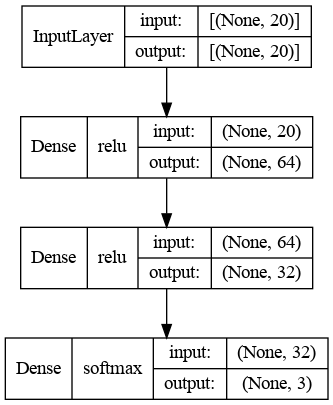

In [30]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True,
                          show_layer_activations=True, show_layer_names=False)

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=4,
          validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

model.save('gesture.h5')

Epoch 1/10
60/60 [==============================] - 3s 9ms/step - loss: 0.9754 - accuracy: 0.4625 - val_loss: 0.8451 - val_accuracy: 0.7000
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 0.7075 - accuracy: 0.7958 - val_loss: 0.5362 - val_accuracy: 1.0000
Epoch 3/10
60/60 [==============================] - 0s 6ms/step - loss: 0.4297 - accuracy: 1.0000 - val_loss: 0.2869 - val_accuracy: 1.0000
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 0.2262 - accuracy: 1.0000 - val_loss: 0.1470 - val_accuracy: 1.0000
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.1117 - accuracy: 1.0000 - val_loss: 0.0758 - val_accuracy: 1.0000
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.0593 - accuracy: 1.0000 - val_loss: 0.0426 - val_accuracy: 1.0000
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 1.0000 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 8/10
60/60 [==

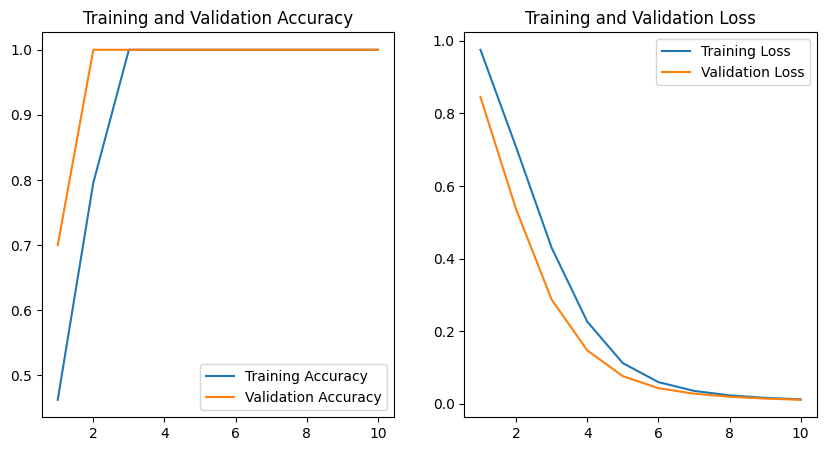

In [32]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss,label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
